In [0]:
import math
import random
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

W0731 02:16:28.747725 140693631297408 deprecation.py:323] From <ipython-input-2-7950cd9991ba>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0731 02:16:28.753963 140693631297408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0731 02:16:28.757788 140693631297408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz


W0731 02:16:29.168582 140693631297408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0731 02:16:29.173401 140693631297408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0731 02:16:29.269942 140693631297408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


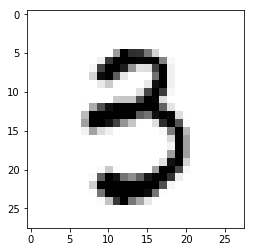

In [2]:
mnist = input_data.read_data_sets("./data", one_hot=True)
r = random.randint(0, mnist.train.num_examples - 1)
plt.imshow(mnist.train.images[r:r+1].reshape(28, 28),
           cmap='Greys', interpolation='nearest')
plt.show()

## Placeholders

In [0]:
# PLACEHOLDERS
model_inputs = tf.placeholder(dtype=tf.float32, shape=[None, 784])
labels = tf.placeholder(dtype=tf.float32, shape=[None, 10])
global_step = tf.Variable(0, name='global_step', trainable=False) # 배리어블이 변하는지 안변하는지 trainable 지정 => 프리테인드 인베딩 되있는거 그대로 하고 trainable =false로 하면 새로 내가 학습된 데이터만 됨
                                                                  # trainable = true 하면 기존 학습 되있는거 다 날리고 내데이터로만 학습



## Variables

In [0]:
# VARIABLES
w = tf.Variable(tf.random_normal(shape=[784, 10]))
b = tf.Variable(tf.random_normal(shape=[10]))

# tf.summary.histogram("weights", w)

## Build a Model

In [0]:
logits = tf.matmul(model_inputs, w) + b
predictions = tf.nn.softmax(logits) ## 애는 0~9까지 확률 뽑아주는게 소프트 맥스 시그모이드는 0과 1로만 분류

In [0]:
# PREDICTION
compare_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))  ## 0~9 사이 하나 확률값 뱉어남
# ACCURACY
accuracy = tf.reduce_mean(tf.cast(compare_pred, "float"))
# COST FUNCTION
loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(predictions), reduction_indices=1))
# OPTIMIZER, TRAIN OPERATION
# train_op 모델세이브, ?? 어느때나 다 필요
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss, global_step=global_step)








## 구글 텐서보드 검색 ㄱㄱ
# 로컬 일때만 된다 환경세팅 해야한다.

# tf.summary.scalar('loss',loss)
# tf.summary.scalar('acc', accuracy)
# merged = tf.summary.merge_all() ## 지금 서머리 했던거 다 합침

## Train a Model (session call)

In [8]:
with tf.Session() as sess:
# 				timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
# 				writer = tf.summary.FileWriter('./logs/%s' % timestamp, sess.graph)
# 				saver = tf.train.Saver()
## 서머리 할때

				sess.run(tf.global_variables_initializer())
			
    ## 모델 간단하면 맣이 학습 시켜야함
				for i in range(50):
						avg_loss = 0.
						for step in range(10000):
								batch_images, batch_labels = mnist.train.next_batch(100)  ##100*784 짜리 매트릭스가 들어왔다
								feeds_train = {model_inputs: batch_images, labels: batch_labels}
								_, loss_val, global_step_val = sess.run([train_op, loss, global_step], feed_dict=feeds_train) # global step val 뒤에 summary_val =, ## sess.run 파라메터 안에 merged  run해줘야 한다
								avg_loss += loss_val
                ## 로스는 계쏙 진동하면서 위아래로 튈거다.
								if (step+1) % 1000 == 0:
										print ("step {} | loss : {}".format(step+1, avg_loss/(step+1)))
                  # writer.add_summary(summary_val, global_step=sess.global_stemp_val) 이러면 텐서보드 만들어짐
                  # cmd 창에서 텐서보드 지정하면 뜸 , 보드 여러개 띄우고 싶다 => 포트번호 여러개
                  
                  
						feeds_test = {model_inputs: mnist.test.images, labels: mnist.test.labels}
						train_acc = sess.run(accuracy, feed_dict=feeds_train)
						test_acc = sess.run(accuracy, feed_dict=feeds_test)
						print("idx: %02d/50 cost: %.3f train_acc: %.3f test_acc: %.3f"
						      % (i+1, avg_loss/(step+1), train_acc, test_acc))

step 1000 | loss : 5.7233760468959805
step 2000 | loss : 4.177150306463242
step 3000 | loss : 3.417203836917877
step 4000 | loss : 2.955724630251527
step 5000 | loss : 2.6405041717886926
step 6000 | loss : 2.4085545329749585
step 7000 | loss : 2.2289431271425317
step 8000 | loss : 2.0865234904028473
step 9000 | loss : 1.9690194417205122
step 10000 | loss : 1.8704817919433117
idx: 01/50 cost: 1.870 train_acc: 0.740 test_acc: 0.806
step 1000 | loss : 0.940369847804308
step 2000 | loss : 0.9247679694592953
step 3000 | loss : 0.9102341046333313
step 4000 | loss : 0.8961560428664088
step 5000 | loss : 0.8819769091308117
step 6000 | loss : 0.8709711205412944
step 7000 | loss : 0.8590929211335523
step 8000 | loss : 0.8488284619208425
step 9000 | loss : 0.839022851838006
step 10000 | loss : 0.8302378223881125
idx: 02/50 cost: 0.830 train_acc: 0.770 test_acc: 0.845
step 1000 | loss : 0.7256354969143868
step 2000 | loss : 0.7233176212906838
step 3000 | loss : 0.7184589892079433
step 4000 | loss 

In [0]:
# 계속 훈련시키면 트레이닝 오버피팅된다 -> test_acc 에 대해서 성능이 떨어지는 순간 => 오버피팅

# 보통
# 0, 1일때는 시그모이드
# 멀티분류는 소프트맥스 쓴다 